# Build a Convolutional Neural Network with less than 20000 parameters to achieve a validation accuracy of 99.4 or more for MNIST dataset 


The target is to build a deep learning CNN model with as little parameters as possible and at the same time achieve a high validation accuracy of 99.4 or more . The low parameter count becomes important when deploying the model in memory constrained devices used in edge computing . MNIST is one of the more popular (and simpler) datasets to begin your journey in Vision based Deep learning. We will use this dataset for this exercise. 

###**Import Libraries and modules**

###Install Keras framework (use -q option to do a quiet install) and import keras

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


###Import other necessary libraries / modules
Import numpy library for array/ matrix operations

Import Sequential Model from keras/models for building the model

Import Conv2D , Activation , Flatten , BatchNormalization, MaxPooling2D from keras/layers 

Import np_utils module from keras/utils for numpy related helper functions

Import mnist dataset containing hand-written digits images from keras.datasets

In [0]:
import numpy as np

from keras.models import Sequential,load_model
from keras.layers import Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


###print the shape of training data and also inspect the first image using matplotlib

(60000, 28, 28)


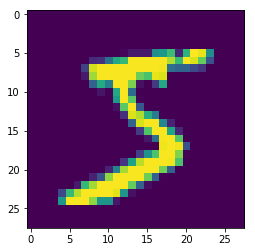

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

####Reshape the training and test dataset to include the channel information.In this case it is a greyscale image and so there is 1 channel . the image data was read in as a 28x28 numpy array and is now reshaped to 28x28x1

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

###Cast training data as float32 and normalize/re-scale the values such that they are between 0 and 1 instead of 0 and 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

###inspect the first 10 training class labels . They will be some number between 0 and 9 representing the hand-written digit in the corresponding Training data. Each of 0 to 9 represents a class

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

####One hot encoding of training and test class labels : Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

###Mount Google Drive to save model files 



In [9]:
def mount_drive():
  from google.colab import drive
  drive.mount('/gdrive',force_remount=True)

mount_drive()



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


###Define a ModelCheckPoint callback which will be called at the end of every training epoch . We will use this callback function to save the model whenever vallidation accuracy improves . We do this so that we can load and use the best model for further predictions after training 

In [0]:
from keras.callbacks import ModelCheckpoint
  
chkpoint_model=ModelCheckpoint("/gdrive/My Drive/EVA/Session3/model_customv1_mnist_best.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max')  



#Building the model version 1

We will try a model that starts with a convolution layer containing 8 numbers of  3x3 size  kernels and repeat this 2 more times . 

All these convolution layers will use ReLU activation function . Using an activation function introduces non-linearity in the network allowing them to learn complex functions .Without these non-linear activation functions the network will only be a stack of linear functions . ReLU activation is one of the simplest and most popular activations used in CNN . It essentially suppresses -ve values from moving forward giving the network a simple rule for retaining or discarding features that it is learning - work towards making values positive if you want something retained and make the values negative if you want to drop something. 

So we now have 3 convolution layers containing 8 numbers of 3x3 filters . At this point , we have a global receptive field of 7x7 . It is always good to build a network that has a global receptive field equal to or more than the size of the object that you are trying to  detect / learn 

Let us do some down-sampling using Maxpooling . We will use pool size of 2x2 . This reduces the channel dimensions to half and doubles the global receptive field . 

After maxpooling , let us add 5 more convolution layers of size 3x3 with ReLU activation. Each layer will have 16 kernels . 


Finally add a 1x1 convolution layer of 10 filters . 1x1 kernel convolution is an effective  way of combining a large number of channels to form a set of smaller number of channels.  Since we have only 10 classes , we will combine the 16 channels from earlier layers to form 10 channels . It is important not to have ReLU activation for this 1x1 layer since we want all values from the convolution to go to the Softmax activation to make its prediction . If we use a ReLu activation , the -ve values will be suppressed and the network will be unable to train in an optimal manner.

These 10 channel outputs are fed to a Flatten layer that converts the 2d array representation to a 1d shape . 

A softmax activation layer at the end outputs the class probabilities of these 10 classes which in our case are the digits 0 to 9 . 



In [11]:
np.random.seed(seed=42)  # set a random seed for reproducing random values 

# instantiate a sequential model
model = Sequential()

# add the first convolution layer - 8 numbers of 3x3 filters , 
#This layer sees the input image of 28x28 x 1 channel . 

model.add(Conv2D(8, (3, 3), input_shape=(28,28,1), use_bias=False))  # remove bias param by setting it to false 
  
model.add(Activation('relu'))    # use ReLU activation function .

# Now the global receptive field is 3 x 3 

# second convolution layer - 8 filters of shape  3x3x8 
#input from previous layer is 26 x 26 x 8 . 

model.add(Conv2D(8, 3, use_bias=False))  # remove bias param by setting it to false 
 
model.add(Activation('relu'))    # use ReLU activation function .

#Global receptive field is 5x5

# Add convolution layer - 8 filters of shape  3x3x8 
#input from previous layer is 24 x 24 x 8 . 

model.add(Conv2D(8, 3, use_bias=False))  # remove bias param by setting it to false 
 
model.add(Activation('relu'))    # use ReLU activation function .


#Global receptive field is 7x7

# Perform 2x2 max pooling  . 
#Input from previous layer is 22 x 22 X 8 

model.add(MaxPooling2D(2,2))


# After max pooling , dimensions reduce by half , i.e they become 11 x 11 . 
# Maxpooling (withpool size 2 and stride 1) doubles receptive field . 
# So global receptive field after max pooling is 14 x 14

# Add convolution layer - 16 filters of shape 3x3x8 
#input from max pooling operation is 11 x 11 x 8 .  

model.add(Conv2D(16, 3,  use_bias=False))  # remove bias param by setting it to false 

model.add(Activation('relu'))    # use ReLU activation function .

#Global receptive field is now 16 x 16 

# Add convolution layer - 16 filters of shape 3x3x16 
#input coming from previous layer is 9 x 9 x 16 . 

model.add(Conv2D(16, 3,  use_bias=False)) # remove bias param by setting it to false 
 
model.add(Activation('relu'))    # use ReLU activation function .

#  Global receptive field is now 18 x 18 

# Add convolution layer - 16 filters of shape 3x3x16 
#input coming from previous layer is 7 x 7 x 16 .

model.add(Conv2D(16, 3,  use_bias=False))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization  
model.add(Activation('relu'))    # use ReLU activation function .

#Global receptive field is now 20 x 20 

# Add convolution layer - 16 filters of shape 3x3x16 
#input coming from previous layer is 5 x 5 x 16 .

model.add(Conv2D(16, 3,  use_bias=False))  # remove bias param by setting it to false 

model.add(Activation('relu'))    # use ReLU activation function .

#Global receptive field is now 22 x 22 

# Add convolution layer - 16 filters of shape 3x3x16 
#input coming from previous layer is 3 x 3 x 16 .

model.add(Conv2D(16, 3,  use_bias=False))  # remove bias param by setting it to false 
 
model.add(Activation('relu'))    # use ReLU activation function .

#Global receptive field is now 24 x 24 

# Add 1x1 convolution layer - 10 filters of shape 1x1x16 . 
# This combines the 16 channels from previous layer to 10 channels 

model.add(Conv2D(10, 1,  use_bias=False))  # remove bias param by setting it to false . 
# Note absence of ReLU activation here 

model.add(Flatten())  # Flatten the 2d array to 1d input for the softmax activation 
model.add(Activation('softmax'))   # Softmax activation to out class probabilities 

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         72        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 8)         576       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 8)         576       
_________________________________________________________________
activation_3 (Activation)    (None, 22, 22, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 8)         0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train, validation_data=(X_test,Y_test),batch_size=32, epochs=100, verbose=1, callbacks=[chkpoint_model])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 15s 247us/step - loss: 0.2087 - acc: 0.9346 - val_loss: 0.0816 - val_acc: 0.9740

Epoch 00001: val_acc improved from -inf to 0.97400, saving model to /gdrive/My Drive/EVA/Session3/model_customv1_mnist_best.h5
Epoch 2/100
60000/60000 [==============================] - 11s 183us/step - loss: 0.0678 - acc: 0.9790 - val_loss: 0.0737 - val_acc: 0.9772

Epoch 00002: val_acc improved from 0.97400 to 0.97720, saving model to /gdrive/My Drive/EVA/Session3/model_customv1_mnist_best.h5
Epoch 3/100
60000/60000 [==============================] - 11s 182us/step - loss: 0.0545 - acc: 0.9833 - val_loss: 0.0469 - val_acc: 0.9855

Epoch 00003: val_acc improved from 0.97720 to 0.98550, saving model to /gdrive/My Drive/EVA/Session3/model_customv1_mnist_best.h5
Epoch 4/100
60000/60000 [==============================] - 11s 184us/step - loss: 0.0480 - a

**Unfortunately we are stuck at 99.27 validation accuracy for this network** 

###Model version 2 : Add Batch Normalization 
Now let us add add Batch Normalization to the same network to see if there is improvement . Batch Normalization is a way for the network take care of internal covariate shift in the features and was first introduced in this paper titled **Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift** https://arxiv.org/abs/1502.03167

We will follow how BatchNormalization was used in the paper i.e Convolution followed Batch Normalization and then Activation although recently some practioners have started using BatchNormalization after activation citing better performance.




In [15]:
np.random.seed(seed=42)  # set a random seed for reproducing random values 

# instantiate a sequential model
model = Sequential()

# add the first convolution layer - 8 numbers of 3x3 filters , 
#This layer sees the input image of 28x28 x 1 channel . 

model.add(Conv2D(8, (3, 3), input_shape=(28,28,1), use_bias=False))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization  
model.add(Activation('relu'))    # use ReLU activation function .

# Now the global receptive field is 3 x 3 

# second convolution layer - 8 filters of shape  3x3x8 
#input from previous layer is 26 x 26 x 8 . 

model.add(Conv2D(8, 3, use_bias=False))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization  
model.add(Activation('relu'))    # use ReLU activation function .

#Global receptive field is 5x5

# Add convolution layer - 8 filters of shape  3x3x8 
#input from previous layer is 24 x 24 x 8 . 

model.add(Conv2D(8, 3, use_bias=False))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization  
model.add(Activation('relu'))    # use ReLU activation function .


#Global receptive field is 7x7

# Perform 2x2 max pooling  . 
#Input from previous layer is 22 x 22 X 8 

model.add(MaxPooling2D(2,2))

#model.add(Dropout(0.33))   # add Dropout for 1/3 of the nodes 

# After max pooling , dimensions reduce by half , i.e they become 11 x 11 . 
# Maxpooling (withpool size 2 and stride 1) doubles receptive field . 
# So global receptive field after max pooling is 14 x 14

# Add convolution layer - 16 filters of shape 3x3x8 
#input from max pooling operation is 11 x 11 x 8 .  

model.add(Conv2D(16, 3,  use_bias=False))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization  
model.add(Activation('relu'))    # use ReLU activation function .

#Global receptive field is now 16 x 16 

# Add convolution layer - 16 filters of shape 3x3x16 
#input coming from previous layer is 9 x 9 x 16 . 

model.add(Conv2D(16, 3,  use_bias=False)) # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization  
model.add(Activation('relu'))    # use ReLU activation function .

#  Global receptive field is now 18 x 18 

# Add convolution layer - 16 filters of shape 3x3x16 
#input coming from previous layer is 7 x 7 x 16 .

model.add(Conv2D(16, 3,  use_bias=False))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization  
model.add(Activation('relu'))    # use ReLU activation function .

#Global receptive field is now 20 x 20 

#model.add(Dropout(0.33)) # add Dropout for 1/3 of the nodes

# Add convolution layer - 16 filters of shape 3x3x16 
#input coming from previous layer is 5 x 5 x 16 .

model.add(Conv2D(16, 3,  use_bias=False))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization  
model.add(Activation('relu'))    # use ReLU activation function .

#Global receptive field is now 22 x 22 

# Add convolution layer - 16 filters of shape 3x3x16 
#input coming from previous layer is 3 x 3 x 16 .

model.add(Conv2D(16, 3,  use_bias=False))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization  
model.add(Activation('relu'))    # use ReLU activation function .

#Global receptive field is now 24 x 24 

# Add 1x1 convolution layer - 10 filters of shape 1x1x16 . 
# This combines the 16 channels from previous layer to 10 channels 

model.add(Conv2D(10, 1,  use_bias=False))  # remove bias param by setting it to false . 
# Note absence of ReLU activation here 

model.add(Flatten())  # Flatten the 2d array to 1d input for the softmax activation 
model.add(Activation('softmax'))   # Softmax activation to out class probabilities 

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 8)         576       
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 8)         32        
_________________________________________________________________
activation_11 (Activation)   (None, 24, 24, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 8)         576       
__________

In [0]:
from keras.callbacks import ModelCheckpoint
  
chkpoint_model=ModelCheckpoint("/gdrive/My Drive/EVA/Session3/model_customv2_mnist_best.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max')  



In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [19]:
model.fit(X_train, Y_train, validation_data=(X_test,Y_test),batch_size=32, epochs=100, verbose=1, callbacks=[chkpoint_model])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 21s 358us/step - loss: 0.5314 - acc: 0.8464 - val_loss: 0.0865 - val_acc: 0.9742

Epoch 00001: val_acc improved from -inf to 0.97420, saving model to /gdrive/My Drive/EVA/Session3/model_customv2_mnist_best.h5
Epoch 2/100
60000/60000 [==============================] - 20s 340us/step - loss: 0.1373 - acc: 0.9586 - val_loss: 0.0539 - val_acc: 0.9837

Epoch 00002: val_acc improved from 0.97420 to 0.98370, saving model to /gdrive/My Drive/EVA/Session3/model_customv2_mnist_best.h5
Epoch 3/100
60000/60000 [==============================] - 22s 360us/step - loss: 0.1007 - acc: 0.9689 - val_loss: 0.0430 - val_acc: 0.9867

Epoch 00003: val_acc improved from 0.98370 to 0.98670, saving model to /gdrive/My Drive/EVA/Session3/model_customv2_mnist_best.h5
Epoch 4/100
60000/60000 [==============================] - 20s 341us/step - loss: 0.0887 - acc: 0.9731 - val_loss: 0.0401 - val_acc: 0.9875


####Using Batch Normalization we obtained a validation accuracy of 99.5 (reached in epoch 62) after running 100 epochs . 

### Model Version 3 : Let us try the same network with Dropout

Basically Dropout helps in regularizing a network against overrfitting by randomly dropping a proportion of the signals while training. The absence of some of the units force the rest of the active units to learn better . 
The concept of Dropout was first present in this paper http://jmlr.org/papers/v15/srivastava14a.html.
Let us drop 1/3 of the signals at a couple of places where we feel the network might have already learnt something useful and may have some redundancy . 

In [0]:
np.random.seed(seed=42)  # set a random seed for reproducing random values 

# instantiate a sequential model
model = Sequential()

# add the first convolution layer - 8 numbers of 3x3 filters , 
#This layer sees the input image of 28x28 x 1 channel . 

model.add(Conv2D(8, (3, 3), input_shape=(28,28,1), use_bias=False))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization  
model.add(Activation('relu'))    # use ReLU activation function .

# Now the global receptive field is 3 x 3 

# second convolution layer - 8 filters of shape  3x3x8 
#input from previous layer is 26 x 26 x 8 . 

model.add(Conv2D(8, 3, use_bias=False))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization  
model.add(Activation('relu'))    # use ReLU activation function .

#Global receptive field is 5x5

# Add convolution layer - 8 filters of shape  3x3x8 
#input from previous layer is 24 x 24 x 8 . 

model.add(Conv2D(8, 3, use_bias=False))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization  
model.add(Activation('relu'))    # use ReLU activation function .


#Global receptive field is 7x7

# Perform 2x2 max pooling  . 
#Input from previous layer is 22 x 22 X 8 

model.add(MaxPooling2D(2,2))

model.add(Dropout(0.33))   # add Dropout for 1/3 of the nodes 

# After max pooling , dimensions reduce by half , i.e they become 11 x 11 . 
# Maxpooling (withpool size 2 and stride 1) doubles receptive field . 
# So global receptive field after max pooling is 14 x 14

# Add convolution layer - 16 filters of shape 3x3x8 
#input from max pooling operation is 11 x 11 x 8 .  

model.add(Conv2D(16, 3,  use_bias=False))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization  
model.add(Activation('relu'))    # use ReLU activation function .

#Global receptive field is now 16 x 16 

# Add convolution layer - 16 filters of shape 3x3x16 
#input coming from previous layer is 9 x 9 x 16 . 

model.add(Conv2D(16, 3,  use_bias=False)) # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization  
model.add(Activation('relu'))    # use ReLU activation function .

#  Global receptive field is now 18 x 18 

# Add convolution layer - 16 filters of shape 3x3x16 
#input coming from previous layer is 7 x 7 x 16 .

model.add(Conv2D(16, 3,  use_bias=False))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization  
model.add(Activation('relu'))    # use ReLU activation function .

#Global receptive field is now 20 x 20 

model.add(Dropout(0.33)) # add Dropout for 1/3 of the nodes

# Add convolution layer - 16 filters of shape 3x3x16 
#input coming from previous layer is 5 x 5 x 16 .

model.add(Conv2D(16, 3,  use_bias=False))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization  
model.add(Activation('relu'))    # use ReLU activation function .

#Global receptive field is now 22 x 22 

# Add convolution layer - 16 filters of shape 3x3x16 
#input coming from previous layer is 3 x 3 x 16 .

model.add(Conv2D(16, 3,  use_bias=False))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization  
model.add(Activation('relu'))    # use ReLU activation function .

#Global receptive field is now 24 x 24 

# Add 1x1 convolution layer - 10 filters of shape 1x1x16 . 
# This combines the 16 channels from previous layer to 10 channels 

model.add(Conv2D(10, 1,  use_bias=False))  # remove bias param by setting it to false . 
# Note absence of ReLU activation here 

model.add(Flatten())  # Flatten the 2d array to 1d input for the softmax activation 
model.add(Activation('softmax'))   # Softmax activation to out class probabilities 

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_10 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
activation_19 (Activation)   (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 8)         576       
_________________________________________________________________
batch_normalization_11 (Batc (None, 24, 24, 8)         32        
_________________________________________________________________
activation_20 (Activation)   (None, 24, 24, 8)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 22, 22, 8)         576       
__________

In [0]:
from keras.callbacks import ModelCheckpoint
  
chkpoint_model=ModelCheckpoint("/gdrive/My Drive/EVA/Session3/model_customv3_mnist_best.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max')  



In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [24]:
model.fit(X_train, Y_train, validation_data=(X_test,Y_test),batch_size=32, epochs=100, verbose=1, callbacks=[chkpoint_model])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 22s 365us/step - loss: 0.5319 - acc: 0.8466 - val_loss: 0.0820 - val_acc: 0.9761

Epoch 00001: val_acc improved from -inf to 0.97610, saving model to /gdrive/My Drive/EVA/Session3/model_customv3_mnist_best.h5
Epoch 2/100
60000/60000 [==============================] - 22s 359us/step - loss: 0.1389 - acc: 0.9581 - val_loss: 0.0531 - val_acc: 0.9837

Epoch 00002: val_acc improved from 0.97610 to 0.98370, saving model to /gdrive/My Drive/EVA/Session3/model_customv3_mnist_best.h5
Epoch 3/100
60000/60000 [==============================] - 21s 344us/step - loss: 0.1030 - acc: 0.9685 - val_loss: 0.0429 - val_acc: 0.9867

Epoch 00003: val_acc improved from 0.98370 to 0.98670, saving model to /gdrive/My Drive/EVA/Session3/model_customv3_mnist_best.h5
Epoch 4/100
60000/60000 [==============================] - 20s 341us/step - loss: 0.0898 - acc: 0.9732 - val_loss: 0.0472 - val_acc: 0.9868


**Using Dropouts in addition to Batch Normalization we obtained a validation accuracy of 99.54 after 100 epochs**

### Let us load the Model with best validation accuracy and print the evaluation score 

In [0]:
model=load_model("/gdrive/My Drive/EVA/Session3/model_customv3_mnist_best.h5")

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [27]:
print(score)

[0.017284836861339862, 0.9954]


### Predict the classes using model.predict and print predicted probabilities and categorical array for True test classes 

In [0]:
y_pred = model.predict(X_test)

In [29]:
print(y_pred[:9])
print(Y_test[:9])

[[3.0716782e-07 2.1349823e-07 5.6653794e-06 8.9690921e-08 8.2904198e-06
  1.3050574e-07 2.7220999e-08 9.9998474e-01 3.9293749e-08 4.9592177e-07]
 [3.6056872e-07 3.4937703e-08 9.9999952e-01 5.1584973e-08 8.4285473e-10
  2.7829195e-10 3.0795448e-08 3.4916052e-08 5.7991127e-08 7.0215789e-10]
 [1.4904915e-09 9.9998069e-01 1.2089476e-08 2.5599768e-08 7.1812960e-06
  9.1240530e-08 1.8259593e-08 1.0810454e-05 3.6627611e-08 1.1785403e-06]
 [9.9999166e-01 2.7834920e-10 9.7693462e-09 2.7358913e-08 1.2389631e-07
  2.0722428e-07 4.4559479e-06 5.3542628e-09 4.0721434e-07 3.1675609e-06]
 [7.1032065e-09 1.0459565e-08 1.8377417e-09 1.4293353e-10 9.9989951e-01
  5.6989091e-08 3.0328856e-08 3.2459763e-08 1.2197431e-06 9.9176425e-05]
 [1.1293455e-09 9.9999213e-01 4.2469468e-09 1.4581947e-11 2.1753046e-06
  3.3279002e-10 1.9187743e-09 4.9808086e-06 2.7484033e-08 7.0956656e-07]
 [1.6467759e-09 3.9426591e-06 1.1972082e-06 5.6160115e-10 9.9989212e-01
  5.6623026e-07 1.3464309e-08 5.1959367e-05 1.9502442e-05 

### Let us visualize some of the filters in the first convolution layer 'conv2d_19'

In [0]:
# form a layer dictionary {name : layer} of all layers in the model 

layer_dict = dict([(layer.name, layer) for layer in model.layers])  

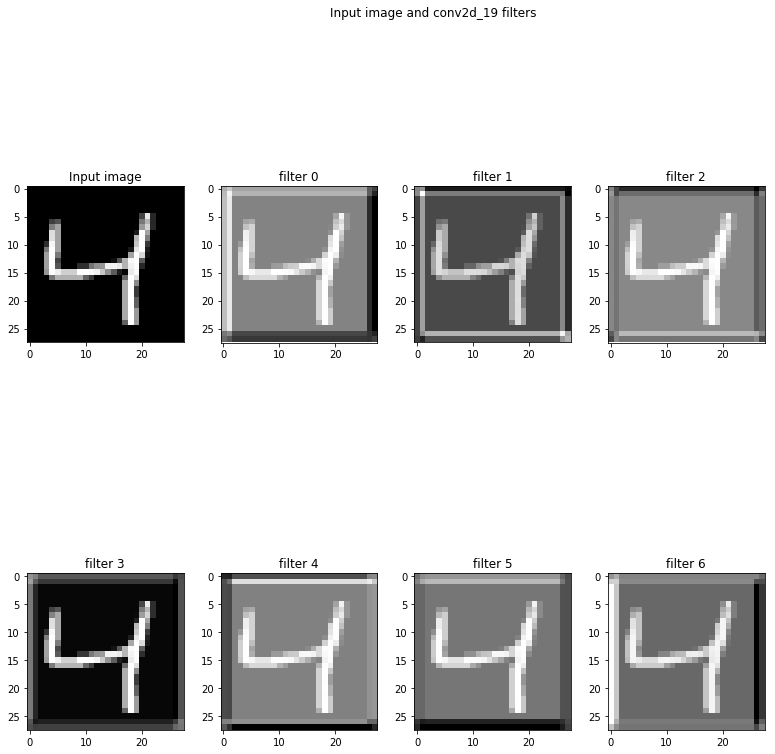

In [32]:
 # use matplotlib to visualize the filter arrays 
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_19'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    elif layer_output.shape[3] >= 8:
        plot_x, plot_y = 2, 4   
    else:
        
        plot_x, plot_y = 2, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    
    ax[0,0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0,0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x,y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x,y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

### We built a model with about 12000 parameters and achieved a max validation accuracy of 99.54 

Using Batch Normalization and Dropouts helped in training faster and avoiding overfitting . 

Using these techniques also allows us to use higher learning rates than usual although we did not tweak the default learning rate in this exercise.

Using Image Augmentation , Global Average pooling , scheduling learning rate adjustments , cyclic learning rate , etc we could build even more efficient models with better accuracy 